In [1]:
from analyse_logs import *

op_df = get_op_df(log_path)
op_df


opid: 101 req
opid: 102 req
opid: 103 req
opid: 104 req
opid: 105 req
opid: 106 req


,opid,method,reply_received,params,start_time,result,end_time,time
0,101,discv5_registerTopic,True,"[1, 101]",1665737674779,None,1665737674786,7
1,102,discv5_registerTopic,True,"[1, 102]",1665737674861,None,1665737674864,3
2,103,discv5_registerTopic,True,"[1, 103]",1665737674878,None,1665737674881,3
3,104,discv5_topicSearch,True,"[1, 1, 104]",1665737684885,[547fdac6e39965b6468e12d608595bedc3f8b0be07ed9...,1665737696901,12016
4,105,discv5_topicSearch,True,"[1, 1, 105]",1665737684886,[e5f8632191d2ac03ff40d23934739f1a7db1297fdcd47...,1665737684892,6
5,106,discv5_topicSearch,True,"[1, 1, 106]",1665737684886,[547fdac6e39965b6468e12d608595bedc3f8b0be07ed9...,1665737684892,6


In [2]:
for i, row in op_df.iterrows():
    #row['topic'] = 
    #print(row)
    op_df.at[i, 'topic'] = row['params'][0]
op_df

#op_df.loc[op_df['stream'] == 2, cols ] = df1 / 2

,opid,method,reply_received,params,start_time,result,end_time,time,topic
0,101,discv5_registerTopic,True,"[1, 101]",1665737674779,None,1665737674786,7,1.0
1,102,discv5_registerTopic,True,"[1, 102]",1665737674861,None,1665737674864,3,1.0
2,103,discv5_registerTopic,True,"[1, 103]",1665737674878,None,1665737674881,3,1.0
3,104,discv5_topicSearch,True,"[1, 1, 104]",1665737684885,[547fdac6e39965b6468e12d608595bedc3f8b0be07ed9...,1665737696901,12016,1.0
4,105,discv5_topicSearch,True,"[1, 1, 105]",1665737684886,[e5f8632191d2ac03ff40d23934739f1a7db1297fdcd47...,1665737684892,6,1.0
5,106,discv5_topicSearch,True,"[1, 1, 106]",1665737684886,[547fdac6e39965b6468e12d608595bedc3f8b0be07ed9...,1665737684892,6,1.0


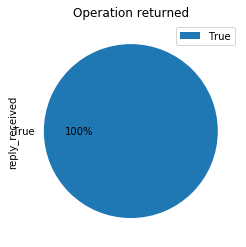

In [3]:
op_df['reply_received'].value_counts().plot(kind = 'pie', autopct='%1.0f%%', legend=True, title='Operation returned')

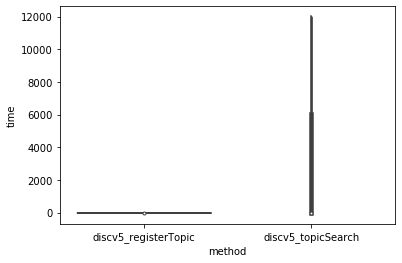

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots()
df = op_df[~op_df['time'].isna()]
df
sns.violinplot(x='method',y='time', data=df, ax = axes, cut=0)
#axes.set_title('Day Ahead Market')

In [5]:
from analyse_logs import *

msg_df = get_msg_df(log_path)
#drop received message and only keep the saved ones
msg_df = msg_df[msg_df['in_out'] == 'out']
msg_df

Reading node-2.log
Reading node-3.log
Reading node-1.log


,node_id,peer_id,in_out,timestamp,msg_type,req_id,key,opid
0,2,1,out,2022-10-14 10:54:30.299670+02:00,FINDNODE/v5,0xa4aa4a0114050329,NaN,NaN
2,2,1,out,2022-10-14 10:54:30.300460+02:00,FINDNODE/v5,0xa4aa4a0114050329,NaN,NaN
4,2,1,out,2022-10-14 10:54:30.301342+02:00,FINDNODE/v5,0xc453862c281fe2ea,NaN,NaN
6,2,1,out,2022-10-14 10:54:30.301640+02:00,FINDNODE/v5,0xf3bfe7987931558e,NaN,NaN
8,2,1,out,2022-10-14 10:54:30.302030+02:00,FINDNODE/v5,0x22d983f7183d59e4,NaN,NaN
...,...,...,...,...,...,...,...,...
765,1,2,out,2022-10-14 10:55:04.901406+02:00,FINDNODE/v5,0x9ffb7b98d8af8e09,NaN,103.0
767,1,2,out,2022-10-14 10:55:04.901526+02:00,NODES/v5,0x5f90de2ff3fa328f,NaN,NaN
770,1,2,out,2022-10-14 10:55:04.901878+02:00,REGTOPIC/v5,0xff2db4d5e8f245e4,1.0,103.0
772,1,2,out,2022-10-14 10:55:04.902263+02:00,REGCONFIRMATION/v5,0x885cb525459cf0bc,NaN,NaN


In [6]:
#set the missing opids and op_types to all the messages being part of operations
#print(msg_df)
for opid in set([i for i in op_df['opid']]):
    print(opid)
    op_type = op_df.loc[op_df['opid'] == opid, 'method'].values[0]
    topic = op_df.loc[op_df['opid'] == opid, 'topic'].values[0]
    for req_id in set([i for i in msg_df[msg_df['opid'] == opid]['req_id']]):
        msg_df.loc[msg_df["req_id"] == req_id, "opid"] = opid
        msg_df.loc[msg_df['req_id'] == req_id, 'op_type'] = op_type
        msg_df.loc[msg_df['req_id'] == req_id, 'topic'] = topic


# TODO: this is very slow now! 
msg_df

101
102
103
104
105
106


,node_id,peer_id,in_out,timestamp,msg_type,req_id,key,opid,op_type,topic
0,2,1,out,2022-10-14 10:54:30.299670+02:00,FINDNODE/v5,0xa4aa4a0114050329,NaN,NaN,NaN,NaN
2,2,1,out,2022-10-14 10:54:30.300460+02:00,FINDNODE/v5,0xa4aa4a0114050329,NaN,NaN,NaN,NaN
4,2,1,out,2022-10-14 10:54:30.301342+02:00,FINDNODE/v5,0xc453862c281fe2ea,NaN,NaN,NaN,NaN
6,2,1,out,2022-10-14 10:54:30.301640+02:00,FINDNODE/v5,0xf3bfe7987931558e,NaN,NaN,NaN,NaN
8,2,1,out,2022-10-14 10:54:30.302030+02:00,FINDNODE/v5,0x22d983f7183d59e4,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
765,1,2,out,2022-10-14 10:55:04.901406+02:00,FINDNODE/v5,0x9ffb7b98d8af8e09,NaN,103.0,discv5_registerTopic,1.0
767,1,2,out,2022-10-14 10:55:04.901526+02:00,NODES/v5,0x5f90de2ff3fa328f,NaN,102.0,discv5_registerTopic,1.0
770,1,2,out,2022-10-14 10:55:04.901878+02:00,REGTOPIC/v5,0xff2db4d5e8f245e4,1.0,103.0,discv5_registerTopic,1.0
772,1,2,out,2022-10-14 10:55:04.902263+02:00,REGCONFIRMATION/v5,0x885cb525459cf0bc,NaN,102.0,discv5_registerTopic,1.0


In [7]:
from numpy import NaN


data = {
            'req_id':[1, 2, 3],
            'op_id':[101, NaN, 103]}
     
    # Convert the dictionary into DataFrame
df = pd.DataFrame(data)
print("Original DataFrame:\n", df)

def add(a, b):
    return a + b
     
df['add'] = df.apply(lambda row : add(row['op_id'],
                     row['req_id']), axis = 1)
df

Original DataFrame:
    req_id  op_id
0       1  101.0
1       2    NaN
2       3  103.0


,req_id,op_id,add
0,1,101.0,102.0
1,2,NaN,NaN
2,3,103.0,106.0


discv5_registerTopic
	 discv5_registerTopic
		 FINDNODE/v5 32
		 NODES/v5 32
		 REGCONFIRMATION/v5 8
		 REGTOPIC/v5 8
	 discv5_registerTopic
		 FINDNODE/v5 32
		 NODES/v5 32
		 REGCONFIRMATION/v5 8
		 REGTOPIC/v5 8
	 discv5_registerTopic
		 FINDNODE/v5 32
		 NODES/v5 32
		 REGCONFIRMATION/v5 8
		 REGTOPIC/v5 8
discv5_topicSearch
	 discv5_topicSearch
		 FINDNODE/v5 14
		 NODES/v5 20
		 TOPICQUERY/v5 6
	 discv5_topicSearch
		 FINDNODE/v5 2
		 NODES/v5 4
		 TOPICQUERY/v5 2
	 discv5_topicSearch
		 FINDNODE/v5 2
		 NODES/v5 4
		 TOPICQUERY/v5 2


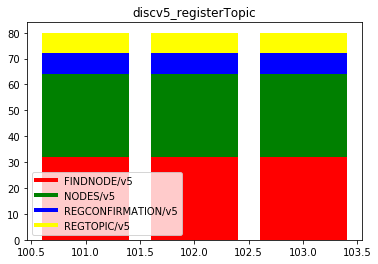

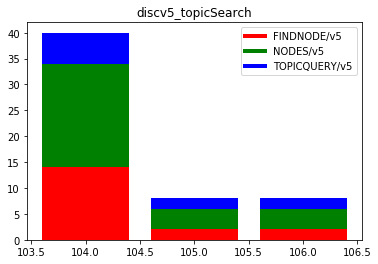

In [8]:
from matplotlib.lines import Line2D

msg_df = msg_df.dropna(subset=['opid'])

colors = ['red', 'green', 'blue', 'yellow']
for op_type, group_op_type in msg_df.groupby('op_type'):
    #if(op_type != 'discv5_registerTopic'):
        #continue
    print(op_type)
    fig, ax = plt.subplots()
    legend_elements = []
    added = set()
    for opid, group_opid in group_op_type.groupby('opid'):
        print("\t", op_type)
        i = 0
        sum = 0
        for msg_type, group_msg_type in group_opid.groupby('msg_type'):
            val = len(group_msg_type)
            ax.bar(opid, val, color=colors[i], bottom = sum)
            sum += val
            print("\t\t", msg_type, len(group_msg_type))
            if(msg_type not in added):
                added.add(msg_type)
                legend_elements.append(Line2D([0], [0], color=colors[i], lw=4, label=msg_type))
            i += 1
    ax.legend(handles=legend_elements)
    ax.set_title(op_type)
plt.show()

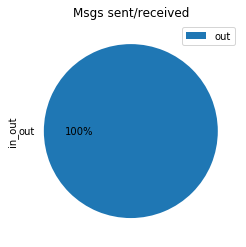

In [9]:
msg_df['in_out'].value_counts().plot(kind='pie', autopct='%1.0f%%', legend=True, title='Msgs sent/received')

Text(0, 0.5, '#Messages')

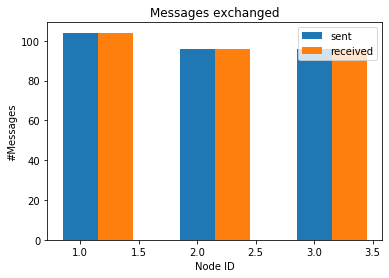

In [10]:
import matplotlib.pyplot as plt

sent = msg_df[msg_df['in_out'] == 'out']['node_id'].value_counts().to_dict()
sent = {int(k):int(v) for k,v in sent.items()} #convert IDs to int

received = msg_df[msg_df['in_out'] == 'out']['peer_id'].value_counts().to_dict()
received = {int(k):int(v) for k,v in received.items()} #convert IDs to int

width =0.3
plt.bar(sent.keys(), sent.values(), width=width, label = 'sent')
plt.bar([x + width for x in received.keys()], received.values(), width=width, label = 'received')
plt.legend()
plt.title('Messages exchanged')
plt.xlabel('Node ID')
plt.ylabel('#Messages')

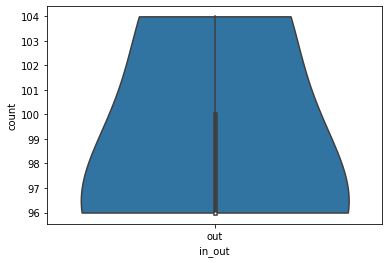

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots()
df_in = msg_df[msg_df['in_out']=='in']['node_id'].value_counts().rename_axis('node_id').reset_index(name='count')
df_in['in_out'] = 'in'
df_out = msg_df[msg_df['in_out']=='out']['node_id'].value_counts().rename_axis('node_id').reset_index(name='count')
df_out['in_out'] = 'out'

df = pd.concat([df_in, df_out], axis=0)
sns.violinplot(x='in_out', y='count', data=df, ax = axes, cut=0, title='#Msg received/sent per node')

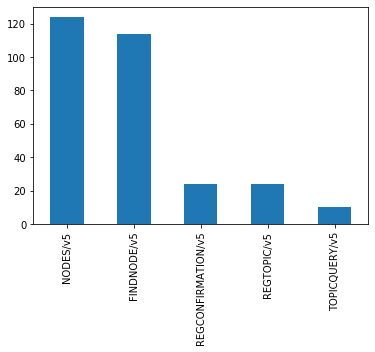

In [12]:
msg_df['msg_type'].value_counts().plot(kind='bar')

discv5_registerTopic
discv5_topicSearch


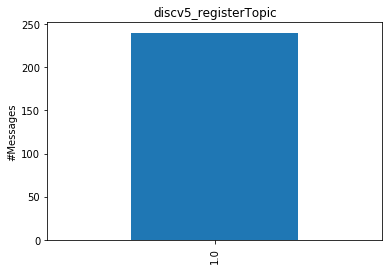

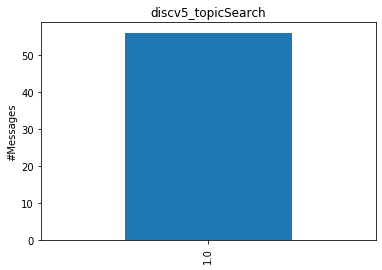

In [13]:
import numpy as np
import math
import hashlib

#df2 = msg_df.dropna()
#regs = msg_df[msg_df['msg_type'] == 'REGTOPIC/v5']['key'].value_counts().to_dict()
#regs = {int(k):int(v) for k,v in sent.items()} #convert IDs to int
#queries = msg_df[msg_df['msg_type'] == 'TOPICQUERY/v5']['key'].value_counts().to_dict()
#received = {int(k):int(v) for k,v in received.items()} #convert IDs to int



for op_type, group_op_type in msg_df.groupby('op_type'):
    print(op_type)
    fig, ax = plt.subplots()
    group_op_type['topic'].value_counts().plot(kind='bar', title=op_type)
    ax.set_ylabel("#Messages")
    #for topic, group_topic in group_op_type.groupby('topic'):
    #    print("\t", topic, len(group_topic))
        #ax.bar(opid, val, color=colors[i], bottom = sum)
        
    
        
        

#width =0.3
#plt.bar(regs.keys(), regs.values(), width=width, label = 'Registrations')
#plt.bar([x + width for x in queries.keys()], queries.values(), width=width, label = 'Queries')
#plt.legend()
#plt.title('Messages exchanged')
#plt.xlabel('Topic')
#plt.ylabel('#Messages')





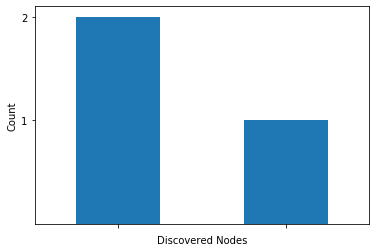

In [14]:
op_df_exploded = op_df.copy()
op_df_exploded = op_df_exploded.explode('result')
fig, axes = plt.subplots()
op_df_exploded['result'].value_counts().plot(ax = axes,kind='bar')
axes.set_xticklabels([])
axes.set_xlabel("Discovered Nodes")
axes.set_ylabel("Count")
axes.set_yticks(list(op_df_exploded['result'].value_counts()))

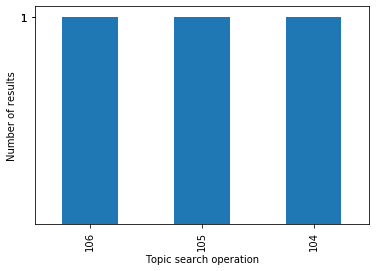

In [15]:
op_df_droppedNone = op_df_exploded.dropna(subset=['result'])
fig, axes = plt.subplots()
op_df_droppedNone['opid'].value_counts().plot(ax=axes, kind='bar')
axes.set_xlabel("Topic search operation")
axes.set_ylabel("Number of results")
axes.set_yticks(list(op_df_droppedNone['opid'].value_counts()))
